In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
import scipy
from sklearn.metrics import r2_score
# plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('pressure_loss.csv')

In [3]:
data['diff_p'] = data['diff_p']*0.24884

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
target = data['diff_p']
data_train = data.drop(['annulus','test_fluid','diff_p'],axis=1)

In [6]:
feature_list = list(data_train.columns)

In [7]:
# convert data frame to np.arrays for processing
target = np.array(target)
data_train = np.array(data_train)

In [8]:
# splitting the data into train, test 
x_train, x_test, y_train, y_test = train_test_split(data_train, target, random_state=42, test_size=0.3)

In [9]:
rf = RandomForestRegressor(n_estimators=5)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [10]:
predict = rf.predict(x_test)

In [12]:
r2_score(predict,y_test)

0.9787345567896495

In [13]:
# feature importance
importances = list(rf.feature_importances_)

#list of tuples with variables and importances
feature_importance = [(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]

feature_importance = sorted(feature_importance,key=lambda x: x[1],reverse=True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance];

Variable: di/do                Importance: 0.58
Variable: flow_rate_gpm        Importance: 0.37
Variable: k                    Importance: 0.04
Variable: ecc                  Importance: 0.0
Variable: shear_pa             Importance: 0.0
Variable: m                    Importance: 0.0


In [14]:
# feature = pd.DataFrame(data=np.round(list(rf.feature_importances_),2),columns=feature_list)
imp_feature=pd.DataFrame(list(rf.feature_importances_))
#imp_feature = imp_feature.T
imp_feature.index = ['Q (gpm)','e','Di/Do','τ_y','K','n']
imp_feature

,0
Q (gpm),0.370326
e,0.002366
Di/Do,0.583853
τ_y,0.002451
K,0.036935
n,0.004070


In [15]:
imp_feature['percentage']=imp_feature[0]*100
imp_feature

,0,percentage
Q (gpm),0.370326,37.032611
e,0.002366,0.236550
Di/Do,0.583853,58.385273
τ_y,0.002451,0.245052
K,0.036935,3.693533
n,0.004070,0.406980


In [16]:
labels = imp_feature.index.to_list()
labels 

['Q (gpm)', 'e', 'Di/Do', 'τ_y', 'K', 'n']

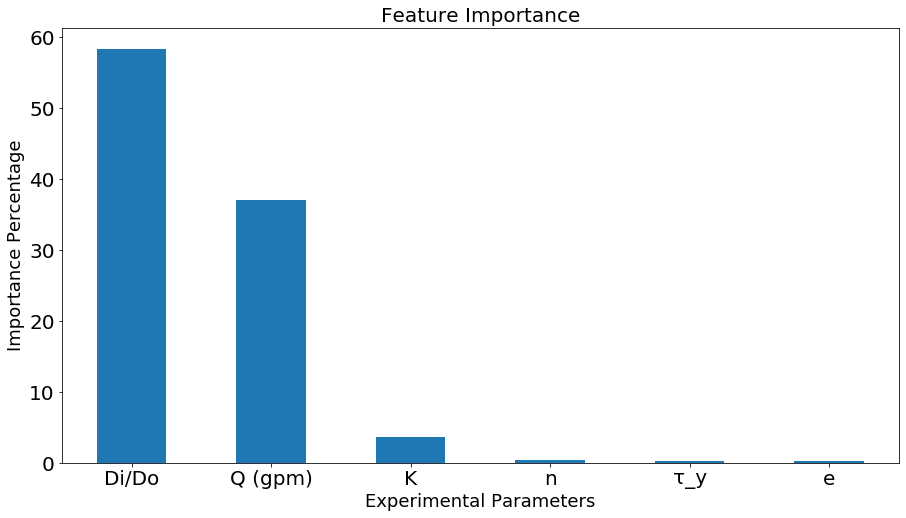

In [17]:
plt.figure(figsize=(15,8))
imp_feature['percentage'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Experimental Parameters',fontsize=18)
#plt.xticks(imp_feature['percentage'],imp_feature.index, rotation='vertical')
plt.ylabel('Importance Percentage',fontsize=18)
plt.title('Feature Importance',fontsize=20)
plt.xticks(rotation=0)
plt.tick_params(labelsize=20)
plt.savefig('feature_importance.jpeg',dpi=200)

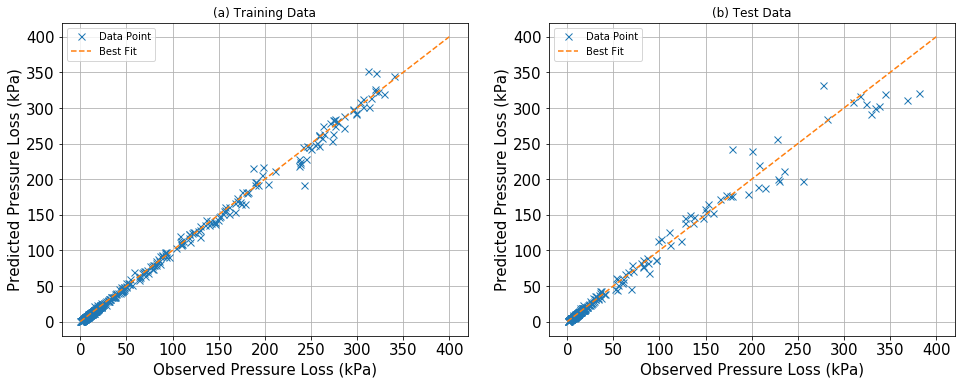

In [18]:
# plot trainning and test data 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
#fig.suptitle('Random Forest', fontsize=16)
fig.subplots_adjust(top=.85, wspace=0.2)

# first track
ax[0].plot((rf.predict(x_train)),(y_train),'x',label='Data Point',ms=7)
ax[0].set_ylabel('Predicted Pressure Loss (kPa)',fontsize=15)
ax[0].set_xlabel('Observed Pressure Loss (kPa)',fontsize=15)
ax[0].grid(True)
ax[0].set_title('(a) Training Data')
ax[0].plot([0,400],[0,400],'--',label='Best Fit')
ax[0].tick_params(labelsize=15)
ax[0].legend()

# second track
ax[1].plot(y_test,predict,'x',label='Data Point',ms=7)
ax[1].set_ylabel('Predicted Pressure Loss (kPa)',fontsize=15)
ax[1].set_xlabel('Observed Pressure Loss (kPa)',fontsize=15)
ax[1].grid(True)
ax[1].set_title('(b) Test Data')
ax[1].plot([0,400],[0,400],'--',label='Best Fit')
ax[1].tick_params(labelsize=15)
ax[1].legend()

#plt.savefig('RF.jpeg',dpi=200)